# Week 4: 1D Diffusion

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

In [2]:
def diffusion_ftcs(tau, h, numSteps):
    # Solve the 1-D diffusion equation for an initial spike profile
    # with Dirichlet conditions using FTCS, in a matrix formulation

    # Calculate the ratio tau/(th/2), where th is the approximate diffusion
    # time for one spatial step h
    
    kappa = 1

    th = h**2/kappa
    print(f"Ratio tau/(0.5*th): {tau/(0.5*th)}")

    # Column vector of x values
    x = np.arange(0, 1 + h, h).reshape(-1, 1)
    L = len(x)

    # Construct the matrix D associated with the second spatial
    # derivative and the boundary conditions
    D = -2 * np.eye(L)
    D = D + np.diag(np.ones(L-1), 1) + np.diag(np.ones(L-1), -1)
    D = kappa * tau * D / h**2

    # Impose the Dirichlet boundary conditions
    D[0, :] = np.zeros(L)
    D[L-1, :] = np.zeros(L)

    # Construct the update matrix
    A = np.eye(L) + D

    # Initial conditions, temp0: a spike at x = 1/2
    temp0 = np.zeros((L, 1))
    # Find the index closest to x = 0.5
    idx = np.abs(x - 0.5).argmin()
    temp0[idx] = 1/h
    temp = temp0.copy()  # temp updates across the run

    # Record T(x,t) matrix for visualization
    time = tau * np.arange(numSteps + 1)
    temp_xt = np.zeros((numSteps + 1, L))
    temp_xt[0, :] = temp.flatten()
    
    # Create arrays to store analytical solutions at each step
    temp_an_array = np.zeros((numSteps + 1,L))

    #-------------------------------------------------------------------------------
    # March forwards in time, FTCS style!
    for n in range(numSteps):
        # Update the temperature profile
        temp = A @ temp

        # Recalculate the profile for the (approximate) analytic solution
        sig = np.sqrt(2 * kappa * time[n+1])
        temp_an = np.exp(-((x - 0.5)**2) / (2 * sig**2)) / (np.sqrt(2 * np.pi) * sig)
        
        # Store the analytical solution for this step
        temp_an_array[n+1, :] = temp_an.flatten()

        # Record T(x,t) matrix for visualization
        temp_xt[n+1, :] = temp.flatten()
        
    return x, temp0, temp_an_array, temp_xt, time, A


Ratio tau/(0.5*th): 0.0
Ratio tau/(0.5*th): 0.1
Ratio tau/(0.5*th): 0.2
Ratio tau/(0.5*th): 0.30000000000000004
Ratio tau/(0.5*th): 0.4
Ratio tau/(0.5*th): 0.5
Ratio tau/(0.5*th): 0.6000000000000001
Ratio tau/(0.5*th): 0.7
Ratio tau/(0.5*th): 0.8
Ratio tau/(0.5*th): 0.8999999999999999
Ratio tau/(0.5*th): 1.0
Ratio tau/(0.5*th): 1.1
Ratio tau/(0.5*th): 1.2000000000000002
Ratio tau/(0.5*th): 1.2999999999999998
Ratio tau/(0.5*th): 1.4
Ratio tau/(0.5*th): 1.5
Ratio tau/(0.5*th): 1.6
Ratio tau/(0.5*th): 1.7000000000000002
Ratio tau/(0.5*th): 1.7999999999999998
Ratio tau/(0.5*th): 1.9
Ratio tau/(0.5*th): 2.0


C:\Users\TheDr\AppData\Local\Temp\ipykernel_22116\1174680284.py:53: RuntimeWarning: divide by zero encountered in divide
  temp_an = np.exp(-((x - 0.5)**2) / (2 * sig**2)) / (np.sqrt(2 * np.pi) * sig)
C:\Users\TheDr\AppData\Local\Temp\ipykernel_22116\1174680284.py:53: RuntimeWarning: invalid value encountered in divide
  temp_an = np.exp(-((x - 0.5)**2) / (2 * sig**2)) / (np.sqrt(2 * np.pi) * sig)


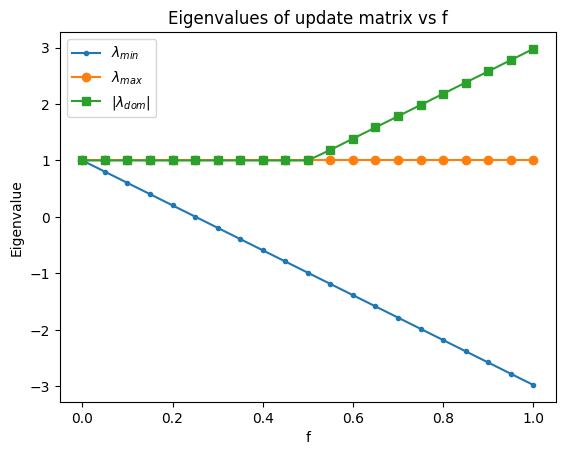

In [3]:
numSteps = 20

f = np.arange(0, 1.01, 0.05)

# Time step and spatial step
h = 0.05
kappa = 1
tau = f[3]*h*h

l_min = []
l_max = []
l_dom = []
for i in f:
    h = 0.05
    kappa = 1
    tau = i*h*h
    A = diffusion_ftcs(tau, h, numSteps)[-1]
    eigenvalues, _ = np.linalg.eig(A)
    l_min.append(np.min(eigenvalues))
    l_max.append(np.max(eigenvalues))

    if np.abs(l_min[-1]) < np.abs(l_max[-1]):
        l_dom.append(l_max[-1])
    else:
        l_dom.append(np.abs(l_min[-1]))


plt.clf()
plt.plot(f, l_min,".-", label="$\lambda_{{min}}$")
plt.plot(f, l_max, "o-", label="$\lambda_{{max}}$")
plt.plot(f, l_dom, "s-", label="$|\lambda_{{dom}}|$")
plt.legend()
plt.xlabel("f")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues of update matrix vs f")
plt.show()



Ratio tau/(0.5*th): 1.1999999999999997


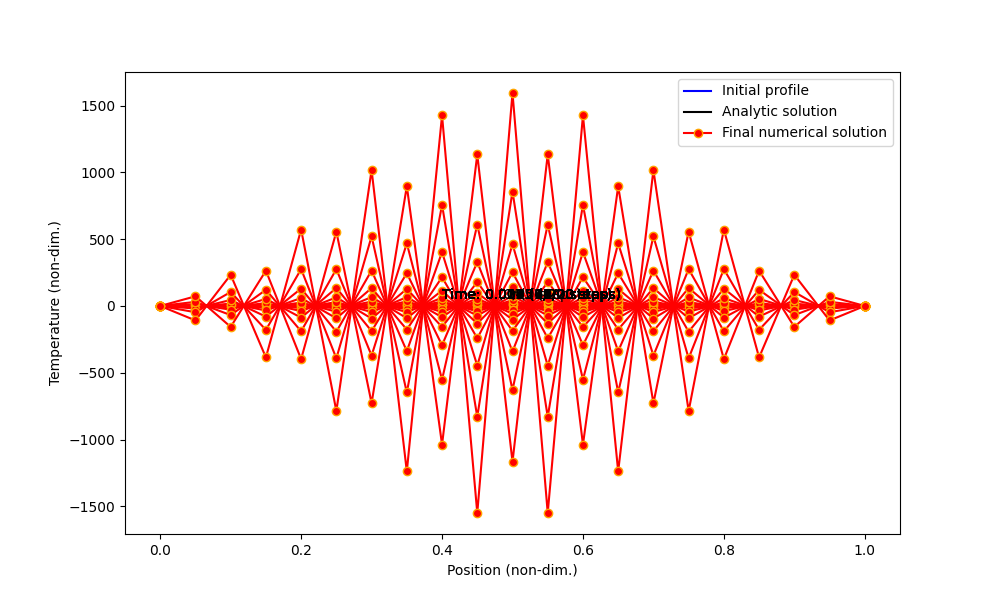

In [ ]:
# Number of time steps
numSteps = 20

f = [0.2, 0.45, 0.5, 0.6]

# Time step and spatial step
h = 0.05
kappa = 1
tau = f[3]*h*h

x, temp0, temp_an_array, temp_numeric, time, _ = diffusion_ftcs(tau, h, numSteps)

#-------------------------------------------------------------------------------
# Plot the results as an animation

%matplotlib widget 
# This enables interactive mode; uncomment and run the following line to go back to static:
# %matplotlib inline
    
# Set up figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('t')
ax.set_ylabel('x')

# Plot initial profile
ax.plot(x, temp0, '-', color='b', linewidth=1.5, label='Initial profile')

# Plot analytic solution
plt.plot(x, temp_an_array[-1, :], 'k-', linewidth=1.5, label='Analytic solution')

# Plot the numerical solutions interactively
artists = []

for i in range(numSteps+1):
    
    label = 'Final numerical solution' if i == numSteps - 1 else None
            
    plot, = ax.plot(x, temp_numeric[i, :] - temp_an_array[i, :], 'ro-', markeredgecolor='orange', label=label)
     
    title = ax.text(0.4, 54, f'Time: {i*tau:.2g} ({i}/20 steps)')    
        
    artists.append([plot, title])
    
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=500, repeat=False)

ax.set_xlabel('Position (non-dim.)')
ax.set_ylabel('Temperature (non-dim.)')
ax.legend()
a

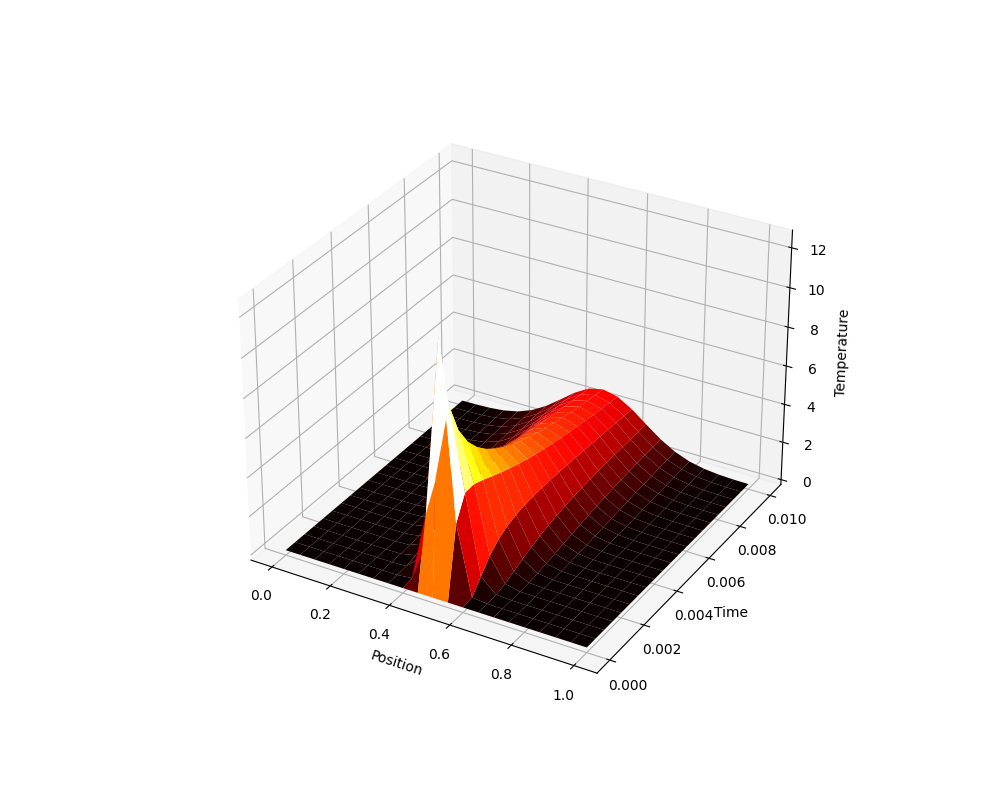

In [14]:
#-------------------------------------------------------------------------------
# Visualization of temperature versus position and time as a 3d surface plot

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D surface plot
X, T = np.meshgrid(x.flatten(), time)
surf = ax.plot_surface(X, T, temp_an_array, cmap='hot', rstride=1, cstride=1)

ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Temperature')

plt.show()

In [1]:
def diffusion_ftcs_new(f, h, numSteps):
    # Solve the 1-D diffusion equation for an initial spike profile
    # with Dirichlet conditions using FTCS, in a matrix formulation

    # Calculate the ratio tau/(th/2), where th is the approximate diffusion
    # time for one spatial step h
    
    kappa = 5

    th = h**2/kappa
    tau = f * ( th)
    print(f"Ratio tau/(0.5*th): {tau/(0.5*th)}")

    # Column vector of x values
    x = np.arange(0, 1 + h, h).reshape(-1, 1)
    L = len(x)

    # Construct the matrix D associated with the second spatial
    # derivative and the boundary conditions
    D = -2 * np.eye(L)
    D = D + np.diag(np.ones(L-1), 1) + np.diag(np.ones(L-1), -1)
    D = kappa * tau * D / h**2

    # Impose the Dirichlet boundary conditions
    D[0, :] = np.zeros(L)
    D[L-1, :] = np.zeros(L)

    # Construct the update matrix
    A = np.eye(L) + D

    # Initial conditions, temp0: a spike at x = 1/2
    temp0 = np.zeros((L, 1))
    # Find the index closest to x = 0.5
    temp0[0] = 0
    temp0[-1] = 1
    temp = temp0.copy()  # temp updates across the run

    # Record T(x,t) matrix for visualization
    time = tau * np.arange(numSteps + 1)
    temp_xt = np.zeros((numSteps + 1, L))
    temp_xt[0, :] = temp.flatten()
    
    # Create arrays to store analytical solutions at each step
    temp_an_array = np.zeros((numSteps + 1,L))

    #-------------------------------------------------------------------------------
    # March forwards in time, FTCS style!
    for n in range(numSteps):
        # Update the temperature profile
        temp = A @ temp

        # Recalculate the profile for the (approximate) analytic solution
        sig = np.sqrt(2 * kappa * time[n+1])
        temp_an = np.exp(-((x - 0.5)**2) / (2 * sig**2)) / (np.sqrt(2 * np.pi) * sig)
        
        # Store the analytical solution for this step
        temp_an_array[n+1, :] = temp_an.flatten()

        # Record T(x,t) matrix for visualization
        temp_xt[n+1, :] = temp.flatten()
        
    return x, temp0, temp_an_array, temp_xt, time, A


Ratio tau/(0.5*th): 0.5


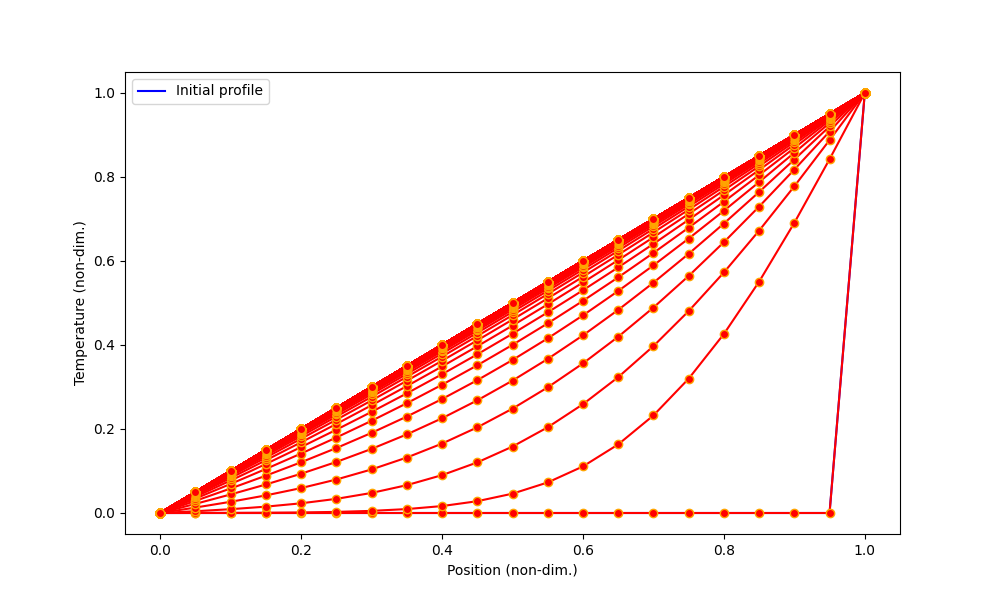

In [6]:
plt.clf()
# Number of time steps
numSteps = 10000

f = 0.25

# Time step and spatial step
h = 0.05

x, temp0, temp_an_array, temp_numeric, time, _ = diffusion_ftcs_new(f, h, numSteps)

#-------------------------------------------------------------------------------
# Plot the results as an animation

%matplotlib widget 
# This enables interactive mode; uncomment and run the following line to go back to static:
# %matplotlib inline
    
# Set up figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('t')
ax.set_ylabel('x')

# Plot initial profile
ax.plot(x, temp0, '-', color='b', linewidth=1.5, label='Initial profile')

# Plot analytic solution
#plt.plot(x, temp_an_array[-1, :], 'k-', linewidth=1.5, label='Analytic solution')

# Plot the numerical solutions interactively
artists = []

for i in range(numSteps+1):
    if i % 50 != 0:
        continue
    
    label = 'Final numerical solution' if i == numSteps - 1 else None
            
    plot, = ax.plot(x, temp_numeric[i, :], 'ro-', markeredgecolor='orange', label=label)

    #ax.set_ylim([-100, 100])
     
    title = ax.text(0.4, 54, f'Time: {i:.2g} ({i}/20 steps)')    
        
    artists.append([plot, title])
    
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=50, repeat=False)

ax.set_xlabel('Position (non-dim.)')
ax.set_ylabel('Temperature (non-dim.)')
ax.legend()

Text(0.5, 0, 'Temperature')

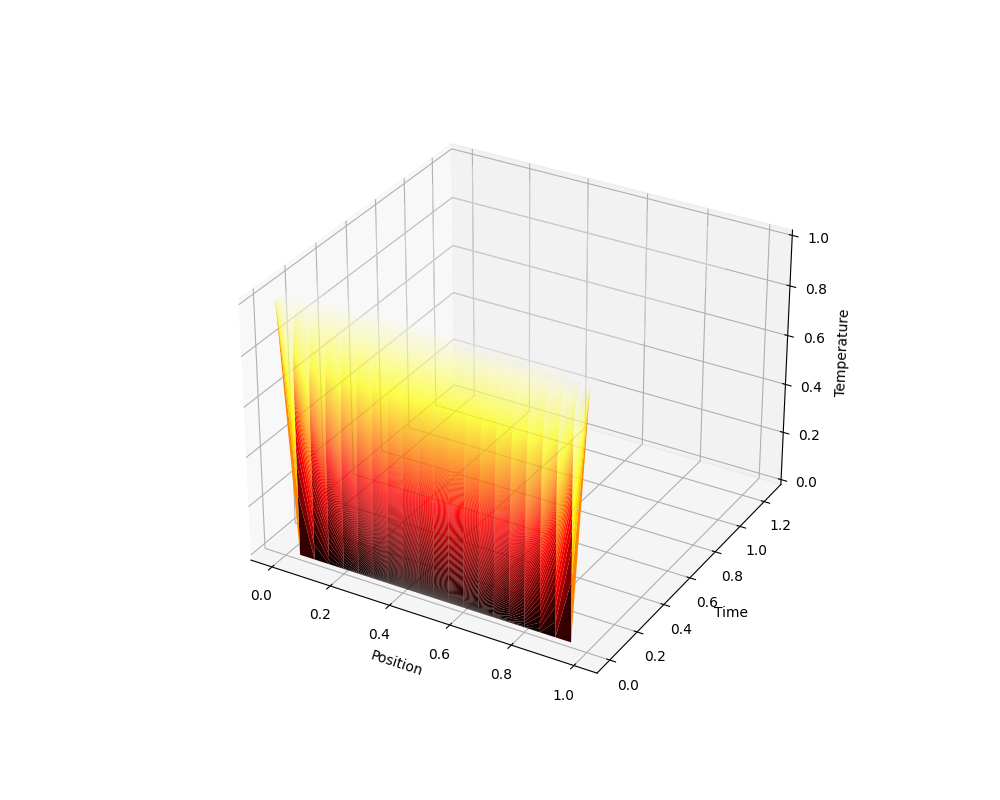

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D surface plot
X, T = np.meshgrid(x.flatten(), time)
surf = ax.plot_surface(X, T, temp_numeric, cmap='hot', rstride=1, cstride=1)

ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Temperature')